<a href="https://www.kaggle.com/oakthyago/electrical-demand-brazil?scriptVersionId=88980859" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# The problem 

- Find the value of one year contract demand for each indrustry unit of Brazil group A (the group who needs demand contract)

## Electrical Demand

### Consume

    In Brazil the industry group needs to deal with a different bill fee the electrical demand. You can easily know how electrical consume works: if you light a lamp that power is 100W witch means that it will comsume 100W/h (watts per hour) it means that each hour that pass with you lamp turn on you should consume 100W. If you use the lamp 8 hours a day and 30 days a month you should consume 8*30*100W = 24000W or 24kW per month just with this lamp.

### Demand
    The demand is some of power in a fraction of time, and we usually takes the maximum demand of a month. In ohter words, our house only have 8 of this 100W/h lamps, if along the month we only light a maximum of 4 lamps at the same time the demand that we need by the power genataror is 400W. If along that month for just one second I light all the 8 lamps you demand for this month will them be 800W.  

# Why there is a annual contract and how its works?

Electricity distribution companies needs to know how much energy your company will demand, its a logistical problem. Then you make a contract that will works for a year, for exemplo a made a 100kW demand contract:

    - if you demand was 100kW or few, you will pay 100kW demand this month
    - if you demand was above 100kW you will pay a 3 times (3x) fee for each demand you passed
        * exemple you demand consuption this month was 120kW, you pay 100kW + (20*3)kW = 160kW 
        


# Congratulation, this is all we need to know to start to work

In [1]:
import pandas as pd
!pip install openpyxl # to use read_excel
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

     |████████████████████████████████| 242 kB 889 kB/s            


In [2]:
df = pd.read_csv("../input/water-company-brazil/WCEB.csv")


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (62,63,64,65) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Data Extraction

In [3]:
pd.set_option('display.max_columns', None)
df.head()

# the dataframe have almost 200000 lines but not all of it is from the group A, we need to get
# it tought

,F_MATRICULA,F_MES,F_ANO,F_REGIONAL,F_CIDADE,F_CODFORNEC,F_REFERENCIA,F_VEN_FATURA,F_COD_FATURA,F_KWH_TF,F_KWH_PF,F_KWH_FPF,F_KVARH_RR,F_KVARH_RPR,F_KVARH_RFPR,F_KW_DTR,F_KW_DPR,F_KW_DFPR,F_KW_DTF,F_KW_DPF,F_KW_DFPF,F_KW_DPC,F_KW_DFPC,F_KW_DTU,F_KW_DPU,F_KW_DFPU,F_MED_ATIVO,F_MED_REATIVO,F_FPR,F_FPPR,F_FPFPR,F_FCR,F_FCPR,F_FCFPR,F_CER,F_VAL_CON,F_VAL_CON_P,F_VAL_CON_FP,F_VAL_UDT,F_VAL_UDP,F_VAL_UDFP,F_VAL_ICMS,F_VAL_TIP,F_VAL_PIS,F_VAL_COFINS,F_VAL_D,F_VAL_DP,F_VAL_DFP,F_VAL_EER,F_VAL_EERP,F_VAL_EERFP,F_VAL_EDR,F_VAL_EDRP,F_VAL_EDRFP,F_VAL_TAXAS,F_VAL_MULTA,F_VAL_JUROS,F_VAL_TP,TENSAO,FPMEDIO,FCMEDIO,CODIGO_DVENC,F_TIPO_UNIDADE,F_CENTROCUSTO,F_CONTAAUX,F_UNIDNEGOCIO,F_FINALIDADE,F_TARIFACAO,F_VAL_BAND_TARIF,F_VAL_DEVOL,F_TIPO_LIGACAO,F_GRUPO_LEITURA
0,1146,3,2003,1,146,1,NaN,NaN,NaN,16848.0,1512.0,15336.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2624.83,4,NaN,NaN,9,NaN,NaN,NaN,NaN,'24',4.0,NaN,NaN,NaN,NaN
1,1146,4,2003,1,146,1,NaN,NaN,NaN,18000.0,1656.0,16344.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2808.94,4,NaN,NaN,12,NaN,NaN,NaN,NaN,'24',4.0,NaN,NaN,NaN,NaN
2,1146,5,2003,1,146,1,NaN,NaN,NaN,19008.0,1440.0,17568.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2955.19,4,NaN,NaN,15,NaN,NaN,NaN,NaN,'24',4.0,NaN,NaN,NaN,NaN
3,1146,6,2003,1,146,1,NaN,NaN,NaN,16632.0,1440.0,15192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2581.10,4,NaN,NaN,18,NaN,NaN,NaN,NaN,'24',4.0,NaN,NaN,NaN,NaN
4,1146,7,2003,1,146,1,NaN,NaN,NaN,23904.0,2088.0,21816.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,3859.28,4,NaN,NaN,21,NaN,NaN,NaN,NaN,'24',4.0,NaN,NaN,NaN,NaN


In [4]:
groupA = pd.read_excel("../input/water-company-brazil/cadastro uc.xlsx")

the UC column has the Consume Unites of group A

In [5]:
groupA.head()

,UC
0,9980570
1,9980574
2,9980235
3,9980816
4,9998244


the isin will help us to get only the group A on the main data frame with this single line

the UC are not organized line by line they are organized in data insted so we need to rum this little code to let the dataframe organized.

In [6]:
listA= groupA["UC"].tolist()
df_analysis= pd.DataFrame()
for x in range(len(listA)):
   df_analysis = pd.concat([df_analysis,df[df['F_MATRICULA'] == groupA["UC"][x]]],ignore_index=True)
      

reseting the index we now have 30000 lines and a new column called index if needed future reference

In [7]:
df_analysis= df.reset_index()
df_analysis

,index,F_MATRICULA,F_MES,F_ANO,F_REGIONAL,F_CIDADE,F_CODFORNEC,F_REFERENCIA,F_VEN_FATURA,F_COD_FATURA,F_KWH_TF,F_KWH_PF,F_KWH_FPF,F_KVARH_RR,F_KVARH_RPR,F_KVARH_RFPR,F_KW_DTR,F_KW_DPR,F_KW_DFPR,F_KW_DTF,F_KW_DPF,F_KW_DFPF,F_KW_DPC,F_KW_DFPC,F_KW_DTU,F_KW_DPU,F_KW_DFPU,F_MED_ATIVO,F_MED_REATIVO,F_FPR,F_FPPR,F_FPFPR,F_FCR,F_FCPR,F_FCFPR,F_CER,F_VAL_CON,F_VAL_CON_P,F_VAL_CON_FP,F_VAL_UDT,F_VAL_UDP,F_VAL_UDFP,F_VAL_ICMS,F_VAL_TIP,F_VAL_PIS,F_VAL_COFINS,F_VAL_D,F_VAL_DP,F_VAL_DFP,F_VAL_EER,F_VAL_EERP,F_VAL_EERFP,F_VAL_EDR,F_VAL_EDRP,F_VAL_EDRFP,F_VAL_TAXAS,F_VAL_MULTA,F_VAL_JUROS,F_VAL_TP,TENSAO,FPMEDIO,FCMEDIO,CODIGO_DVENC,F_TIPO_UNIDADE,F_CENTROCUSTO,F_CONTAAUX,F_UNIDNEGOCIO,F_FINALIDADE,F_TARIFACAO,F_VAL_BAND_TARIF,F_VAL_DEVOL,F_TIPO_LIGACAO,F_GRUPO_LEITURA
0,0,1146,3,2003,1,146,1,NaN,NaN,NaN,16848.0,1512.0,15336.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2624.83,4,NaN,NaN,9,NaN,NaN,NaN,NaN,'24',4.0,NaN,NaN,NaN,NaN
1,1,1146,4,2003,1,146,1,NaN,NaN,NaN,18000.0,1656.0,16344.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2808.94,4,NaN,NaN,12,NaN,NaN,NaN,NaN,'24',4.0,NaN,NaN,NaN,NaN
2,2,1146,5,2003,1,146,1,NaN,NaN,NaN,19008.0,1440.0,17568.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2955.19,4,NaN,NaN,15,NaN,NaN,NaN,NaN,'24',4.0,NaN,NaN,NaN,NaN
3,3,1146,6,2003,1,146,1,NaN,NaN,NaN,16632.0,1440.0,15192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2581.10,4,NaN,NaN,18,NaN,NaN,NaN,NaN,'24',4.0,NaN,NaN,NaN,NaN
4,4,1146,7,2003,1,146,1,NaN,NaN,NaN,23904.0,2088.0,21816.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,3859.28,4,NaN,NaN,21,NaN,NaN,NaN,NaN,'24',4.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173179,173179,133534,5,2019,4,87,1,'052019','11/06/2019',702.0,7516.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,'00008953382','0',0.0,0.0,0.0,0.0,0.0,0.0,NaN,3967.31,0.0,396731.0,0.0,0.0,0.0,0.0,22.01,44.81,206.39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3989.32,1,0.0,0.0,1124,'P','1.49.02000','4087','001','29',1.0,NaN,NaN,NaN,NaN
173180,173180,457660,5,2019,4,86,1,'052019','11/06/2019',702.0,8205.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,'00008458946','00008458946',0.0,0.0,0.0,0.0,0.0,0.0,NaN,4331.00,0.0,433100.0,0.0,0.0,0.0,0.0,28.30,48.91,225.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4359.30,1,0.0,0.0,1124,'P','1.49.02000','4086','001','01',1.0,NaN,NaN,NaN,NaN
173181,173181,462609,5,2019,4,125,1,'052019','11/06/2019',702.0,4810.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,'00008560440','0',0.0,0.0,0.0,0.0,0.0,0.0,NaN,2538.95,0.0,253895.0,0.0,0.0,0.0,0.0,0.00,28.67,132.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2538.95,1,0.0,0.0,1124,'P','1.49.02000','4125','001','02',1.0,NaN,NaN,NaN,NaN
173182,173182,382387,5,2019,6,108,1,'052019','11/06/2019',702.0,9370.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,'00008065426','00008065426',0.0,0.0,0.0,0.0,0.0,0.0,NaN,4945.95,0.0,494595.0,0.0,0.0,0.0,0.0,22.01,55.86,257.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4967.96,1,0.0,0.0,1124,'P','1.49.02000','61

now we need to know what each column talks about, lets get a csv file that will help us

In [8]:
legend_info = pd.read_csv("../input/water-company-brazil/Traslated Legends.csv")

In [9]:
legend_info

,column,Legend
0,F_KWH_TF,Total Billed Active Energy Consumption
1,F_KWH_PF,Active Energy Consumption Billed Point.
2,F_KWH_FPF,Billed Off-peak Active Energy Consumption.
3,F_KVARH_RR,Total Reactive Energy Consumption
4,F_KVARH_RPR,Consumption Reactive Energy Registered End
5,F_KVARH_RFPR,Off-peak Reactive Energy Consumption
6,F_KW_DTR,Total Registered Demand.
7,F_KW_DPR,Demand Point Registered.
8,F_KW_DFPR,Registered Off-End Demand.
9,F_KW_DTF,In Demand Total Invoice.


# Data Analysis

In [10]:
df_analysis

,index,F_MATRICULA,F_MES,F_ANO,F_REGIONAL,F_CIDADE,F_CODFORNEC,F_REFERENCIA,F_VEN_FATURA,F_COD_FATURA,F_KWH_TF,F_KWH_PF,F_KWH_FPF,F_KVARH_RR,F_KVARH_RPR,F_KVARH_RFPR,F_KW_DTR,F_KW_DPR,F_KW_DFPR,F_KW_DTF,F_KW_DPF,F_KW_DFPF,F_KW_DPC,F_KW_DFPC,F_KW_DTU,F_KW_DPU,F_KW_DFPU,F_MED_ATIVO,F_MED_REATIVO,F_FPR,F_FPPR,F_FPFPR,F_FCR,F_FCPR,F_FCFPR,F_CER,F_VAL_CON,F_VAL_CON_P,F_VAL_CON_FP,F_VAL_UDT,F_VAL_UDP,F_VAL_UDFP,F_VAL_ICMS,F_VAL_TIP,F_VAL_PIS,F_VAL_COFINS,F_VAL_D,F_VAL_DP,F_VAL_DFP,F_VAL_EER,F_VAL_EERP,F_VAL_EERFP,F_VAL_EDR,F_VAL_EDRP,F_VAL_EDRFP,F_VAL_TAXAS,F_VAL_MULTA,F_VAL_JUROS,F_VAL_TP,TENSAO,FPMEDIO,FCMEDIO,CODIGO_DVENC,F_TIPO_UNIDADE,F_CENTROCUSTO,F_CONTAAUX,F_UNIDNEGOCIO,F_FINALIDADE,F_TARIFACAO,F_VAL_BAND_TARIF,F_VAL_DEVOL,F_TIPO_LIGACAO,F_GRUPO_LEITURA
0,0,1146,3,2003,1,146,1,NaN,NaN,NaN,16848.0,1512.0,15336.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2624.83,4,NaN,NaN,9,NaN,NaN,NaN,NaN,'24',4.0,NaN,NaN,NaN,NaN
1,1,1146,4,2003,1,146,1,NaN,NaN,NaN,18000.0,1656.0,16344.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2808.94,4,NaN,NaN,12,NaN,NaN,NaN,NaN,'24',4.0,NaN,NaN,NaN,NaN
2,2,1146,5,2003,1,146,1,NaN,NaN,NaN,19008.0,1440.0,17568.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2955.19,4,NaN,NaN,15,NaN,NaN,NaN,NaN,'24',4.0,NaN,NaN,NaN,NaN
3,3,1146,6,2003,1,146,1,NaN,NaN,NaN,16632.0,1440.0,15192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2581.10,4,NaN,NaN,18,NaN,NaN,NaN,NaN,'24',4.0,NaN,NaN,NaN,NaN
4,4,1146,7,2003,1,146,1,NaN,NaN,NaN,23904.0,2088.0,21816.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,3859.28,4,NaN,NaN,21,NaN,NaN,NaN,NaN,'24',4.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173179,173179,133534,5,2019,4,87,1,'052019','11/06/2019',702.0,7516.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,'00008953382','0',0.0,0.0,0.0,0.0,0.0,0.0,NaN,3967.31,0.0,396731.0,0.0,0.0,0.0,0.0,22.01,44.81,206.39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3989.32,1,0.0,0.0,1124,'P','1.49.02000','4087','001','29',1.0,NaN,NaN,NaN,NaN
173180,173180,457660,5,2019,4,86,1,'052019','11/06/2019',702.0,8205.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,'00008458946','00008458946',0.0,0.0,0.0,0.0,0.0,0.0,NaN,4331.00,0.0,433100.0,0.0,0.0,0.0,0.0,28.30,48.91,225.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4359.30,1,0.0,0.0,1124,'P','1.49.02000','4086','001','01',1.0,NaN,NaN,NaN,NaN
173181,173181,462609,5,2019,4,125,1,'052019','11/06/2019',702.0,4810.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,'00008560440','0',0.0,0.0,0.0,0.0,0.0,0.0,NaN,2538.95,0.0,253895.0,0.0,0.0,0.0,0.0,0.00,28.67,132.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2538.95,1,0.0,0.0,1124,'P','1.49.02000','4125','001','02',1.0,NaN,NaN,NaN,NaN
173182,173182,382387,5,2019,6,108,1,'052019','11/06/2019',702.0,9370.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,'00008065426','00008065426',0.0,0.0,0.0,0.0,0.0,0.0,NaN,4945.95,0.0,494595.0,0.0,0.0,0.0,0.0,22.01,55.86,257.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4967.96,1,0.0,0.0,1124,'P','1.49.02000','61

In [11]:
df_analysis.describe()

,index,F_MATRICULA,F_MES,F_ANO,F_REGIONAL,F_CIDADE,F_CODFORNEC,F_COD_FATURA,F_KWH_TF,F_KWH_PF,F_KWH_FPF,F_KVARH_RR,F_KVARH_RPR,F_KVARH_RFPR,F_KW_DTR,F_KW_DPR,F_KW_DFPR,F_KW_DTF,F_KW_DPF,F_KW_DFPF,F_KW_DPC,F_KW_DFPC,F_KW_DTU,F_KW_DPU,F_KW_DFPU,F_FPR,F_FPPR,F_FPFPR,F_FCR,F_FCPR,F_FCFPR,F_CER,F_VAL_CON,F_VAL_CON_P,F_VAL_CON_FP,F_VAL_UDT,F_VAL_UDP,F_VAL_UDFP,F_VAL_ICMS,F_VAL_TIP,F_VAL_PIS,F_VAL_COFINS,F_VAL_D,F_VAL_DP,F_VAL_DFP,F_VAL_EER,F_VAL_EERP,F_VAL_EERFP,F_VAL_EDR,F_VAL_EDRP,F_VAL_EDRFP,F_VAL_TAXAS,F_VAL_MULTA,F_VAL_JUROS,F_VAL_TP,TENSAO,FPMEDIO,FCMEDIO,CODIGO_DVENC,F_TARIFACAO,F_VAL_BAND_TARIF,F_VAL_DEVOL,F_TIPO_LIGACAO,F_GRUPO_LEITURA
count,173184.000000,1.731840e+05,173184.000000,173184.000000,173184.000000,173184.000000,173184.000000,130021.000000,1.613950e+05,170641.000000,1.708750e+05,1.496900e+04,1.190930e+05,1.138270e+05,130476.000000,130055.000000,130053.000000,130493.000000,130054.000000,1.300530e+05,1.300200e+05,1.044630e+05,92906.000000,130021.000000,130021.000000,130354.000000,130180.000000,130181.000000,130084.000000,130020.000000,130020.000000,680.000000,1.297350e+05,130021.000000,1.243930e+05,92910.000000,130021.000000,130021.000000,130047.000000,130089.000000,91792.000000,91792.000000,130021.000000,130021.000000,130021.000000,130816.000000,130021.000000,130021.000000,134044.000000,130021.000000,130021.000000,130018.000000,51988.000000,23774.000000,173180.000000,173184.000000,34561.000000,34561.000000,173184.000000,140923.000000,2.549300e+04,25471.0,25471.000000,25471.000000
mean,86591.500000,2.099548e+06,6.417602,2011.281094,2.720384,80.038445,1.092659,675.642904,9.134563e+03,918.965605,1.186703e+04,8.479639e+03,1.069805e+02,9.450444e+02,23.350018,21.175249,34.289091,17.888455,25.748469,9.689853e+01,1.026446e+02,2.622858e+02,0.367307,21.087819,0.283424,0.369619,0.091136,0.091490,0.226922,0.003562,0.029246,0.480279,4.864666e+03,436.736275,9.809110e+03,16.362568,5.608397,53.825447,764.443528,86.860053,78.372145,360.908467,3025.237766,912.147107,2118.955662,174.465688,18.005639,114.375778,27.935875,14.817448,16.058124,87.599673,93.656538,59.830064,5322.900082,1.786545,0.912578,0.325045,612.376813,1.575286,3.629989e+04,0.0,1.191041,2.262377
std,49994.058847,5.856373e+06,3.450672,4.760226,1.455079,68.279349,0.351245,91.577925,5.295504e+04,6720.345723,9.457015e+04,1.419184e+05,1.637743e+04,4.652389e+04,283.622757,157.371891,355.367093,47.537015,180.810328,2.219497e+04,1.961230e+04,3.419661e+04,17.097432,874.401180,23.762242,0.511006,0.290184,0.290013,2.980649,0.159956,0.336025,0.843225,2.531684e+04,4650.822201,5.164964e+04,241.703930,381.041967,1280.530603,4786.422470,879.182994,363.565220,1674.039108,15370.696795,7733.933138,10897.251575,1377.471082,573.272294,1279.858878,2083.770899,1782.947872,2783.363821,1534.417405,664.261427,342.248688,23261.231630,1.216532,0.543333,0.508794,335.169198,1.087708,3.189168e+05,0.0,0.393129,0.961683
min,0.000000,1.000000e+00,1.000000,2003.000000,0.000000,1.000000,1.000000,101.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-63740.600000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00,0.0,1.000000,1.000000
25%,43295.750000,4.816800e+04,3.000000,2007.000000,2.000000,19.000000,1.000000,702.000000,4.500000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.210000,3.692000e+01,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.580000,2.700000,0.000000,0.000000,0.000000,0.00

<AxesSubplot:>

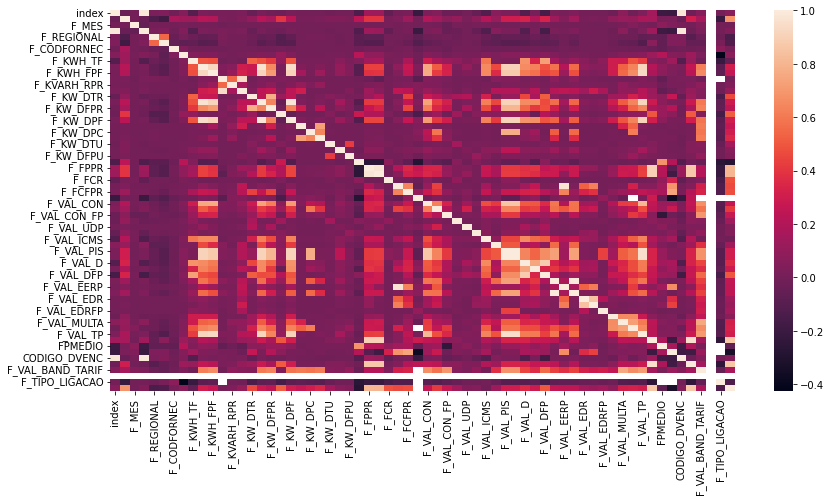

In [12]:
plt.figure(figsize=(14, 7))
# lets check the correlation
df_analysis.corr()
sns.heatmap(df_analysis.corr())

In [13]:
plt.figure(figsize=(12, 7))
df_analysis.cov()

,index,F_MATRICULA,F_MES,F_ANO,F_REGIONAL,F_CIDADE,F_CODFORNEC,F_COD_FATURA,F_KWH_TF,F_KWH_PF,F_KWH_FPF,F_KVARH_RR,F_KVARH_RPR,F_KVARH_RFPR,F_KW_DTR,F_KW_DPR,F_KW_DFPR,F_KW_DTF,F_KW_DPF,F_KW_DFPF,F_KW_DPC,F_KW_DFPC,F_KW_DTU,F_KW_DPU,F_KW_DFPU,F_FPR,F_FPPR,F_FPFPR,F_FCR,F_FCPR,F_FCFPR,F_CER,F_VAL_CON,F_VAL_CON_P,F_VAL_CON_FP,F_VAL_UDT,F_VAL_UDP,F_VAL_UDFP,F_VAL_ICMS,F_VAL_TIP,F_VAL_PIS,F_VAL_COFINS,F_VAL_D,F_VAL_DP,F_VAL_DFP,F_VAL_EER,F_VAL_EERP,F_VAL_EERFP,F_VAL_EDR,F_VAL_EDRP,F_VAL_EDRFP,F_VAL_TAXAS,F_VAL_MULTA,F_VAL_JUROS,F_VAL_TP,TENSAO,FPMEDIO,FCMEDIO,CODIGO_DVENC,F_TARIFACAO,F_VAL_BAND_TARIF,F_VAL_DEVOL,F_TIPO_LIGACAO,F_GRUPO_LEITURA
index,2.499406e+09,-1.067176e+10,571.160010,2.354763e+05,1.175782e+03,1.174037e+05,-269.127117,1.973916e+05,-2.805458e+08,6.016747e+06,4.322070e+07,1.084316e+08,5.275455e+06,3.868648e+07,-6.250392e+05,1.145184e+05,-2.757879e+05,-4.737342e+04,7.895576e+04,2.491979e+06,-5.998493e+06,-7.444038e+06,-6.597601e+03,-1.271730e+05,-6.897965e+03,-3385.990777,1962.922235,1866.198042,-8618.571763,17.549133,215.459259,-699.851256,2.571607e+07,1.019762e+07,-8.658182e+07,-2.659089e+05,-3.517750e+04,-3.010821e+06,-2.906411e+07,2.439737e+06,2.325629e+05,1.065354e+06,-8.350061e+07,2.480980e+06,-8.569625e+07,1.567116e+06,1.372479e+05,2.229806e+06,-1.049290e+05,7.437875e+04,-6.710520e+05,-1.854841e+06,2.158747e+06,-2.652851e+05,3.234805e+07,8.731826e+03,-5554.807255,-5579.723940,1.642261e+07,-1.306589e+03,2.171707e+08,0.0,6.835179,7.090193e+02
F_MATRICULA,-1.067176e+10,3.429710e+13,-19918.127557,-1.079711e+06,-1.139962e+06,-6.968450e+07,340179.914273,4.904483e+07,3.984220e+10,5.305367e+09,7.008769e+10,1.710623e+10,7.833410e+08,6.515667e+09,1.596692e+08,1.399901e+08,2.306479e+08,1.153609e+08,1.671444e+08,6.985662e+08,7.482657e+08,1.929930e+09,2.434389e+06,1.323659e+08,1.990021e+06,541856.575728,451896.422701,455576.915930,188943.062808,21806.177128,175294.317159,-23666.650995,2.061723e+10,2.680361e+09,1.289594e+10,9.549084e+07,2.689442e+07,4.073527e+08,4.091350e+09,4.093720e+08,4.009519e+08,1.846243e+09,2.028154e+10,5.879618e+09,1.443563e+10,1.078647e+09,1.217559e+08,7.475092e+08,1.920220e+08,1.089537e+08,1.161922e+08,5.090619e+08,4.894850e+08,2.775596e+08,2.452343e+10,1.138050e+06,62179.733958,91655.361370,-7.759363e+07,2.006859e+06,1.929667e+11,0.0,-267083.285600,2.150116e+06
F_MES,5.711600e+02,-1.991813e+04,11.907140,-8.879121e-01,-1.077582e-03,8.586386e-01,-0.000377,1.609567e+00,4.185102e+02,-3.062200e+01,-1.422908e+02,-3.824513e+03,-1.532867e+02,-6.891405e+02,-8.942286e-01,-6.427025e-01,-1.261319e+00,-1.126170e-01,-6.673864e-01,3.587831e+01,-1.470085e+02,-3.508638e+01,4.590896e-03,-1.018743e+01,6.069990e-02,0.003969,-0.001614,-0.001026,0.148910,0.001366,0.004645,-0.003757,7.434722e+02,3.001545e+01,-7.281882e+03,4.693715e+00,2.408469e+00,2.112285e+01,1.911341e+02,3.901138e+00,-4.903040e+00,-2.274448e+01,3.492376e+02,-9.176127e+00,3.618925e+02,9.360361e+00,6.616098e+00,3.404254e+00,-2.502971e+01,-1.045894e+01,-2.434514e+01,1.813197e+01,2.222161e+01,6.188389e+01,4.672272e+02,2.208625e-03,0.133147,0.057628,8.228516e+00,-1.021787e-02,5.534956e+04,0.0,-0.002327,-8.104691e-03
F_ANO,2.354763e+05,-1.079711e+06,-0.887912,2.265975e+01,1.155078e-01,1.176495e+01,-0.025134,1.858575e+01,-2.735773e+04,5.511611e+02,3.874486e+03,1.108452e+04,5.088281e+02,3.659511e+03,-6.111450e+01,1.013945e+01,-2.777374e+01,-4.843374e+00,6.744531e+00,1.609262e+02,-6.301115e+02,-9.032885e+02,-6.082826e-01,-1.462530e+01,-6.499529e-01,-0.309440,0.184013,0.174395,-0.840396,0.001649,0.019697,-0.067122,2.414996e+03,9.500105e+02,-1.044574e+04,-2.488958e+01,-3.583152e+00,-2.948585e+02,-2.735331e+03,2.322864e+02,2.221733e+01,1.017594e+02,-8.223431e+03,2.410013e+02,-8.440346e+03,1.497883e+02,1.321165e+01,2.102484e+02,-4.869518e+00,1.106661e+01,-6.754981e+01,-1.957698e+02,2.030791e+02,-3.415700e+01,3.067401e+03,8.246664e-01,-0.509968,-0.518365,1.579785e+03,-1.426885e-01,7.363155e+03,0.0,0.001144,3.324220e-02
F_REGIONAL,1.175782e+03,-1.139962e+06,-0.0010

<Figure size 864x504 with 0 Axes>

A big challenge in this dataset is the amount of null. Its important to check what the columns that has useful information. Actually this information was get from a data bank and its necessary give meaning to all those information

In [14]:
df_analysis.isnull().any().sum()

64

In [15]:
df_analysis.head(20)

,index,F_MATRICULA,F_MES,F_ANO,F_REGIONAL,F_CIDADE,F_CODFORNEC,F_REFERENCIA,F_VEN_FATURA,F_COD_FATURA,F_KWH_TF,F_KWH_PF,F_KWH_FPF,F_KVARH_RR,F_KVARH_RPR,F_KVARH_RFPR,F_KW_DTR,F_KW_DPR,F_KW_DFPR,F_KW_DTF,F_KW_DPF,F_KW_DFPF,F_KW_DPC,F_KW_DFPC,F_KW_DTU,F_KW_DPU,F_KW_DFPU,F_MED_ATIVO,F_MED_REATIVO,F_FPR,F_FPPR,F_FPFPR,F_FCR,F_FCPR,F_FCFPR,F_CER,F_VAL_CON,F_VAL_CON_P,F_VAL_CON_FP,F_VAL_UDT,F_VAL_UDP,F_VAL_UDFP,F_VAL_ICMS,F_VAL_TIP,F_VAL_PIS,F_VAL_COFINS,F_VAL_D,F_VAL_DP,F_VAL_DFP,F_VAL_EER,F_VAL_EERP,F_VAL_EERFP,F_VAL_EDR,F_VAL_EDRP,F_VAL_EDRFP,F_VAL_TAXAS,F_VAL_MULTA,F_VAL_JUROS,F_VAL_TP,TENSAO,FPMEDIO,FCMEDIO,CODIGO_DVENC,F_TIPO_UNIDADE,F_CENTROCUSTO,F_CONTAAUX,F_UNIDNEGOCIO,F_FINALIDADE,F_TARIFACAO,F_VAL_BAND_TARIF,F_VAL_DEVOL,F_TIPO_LIGACAO,F_GRUPO_LEITURA
0,0,1146,3,2003,1,146,1,NaN,NaN,NaN,16848.0,1512.0,15336.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2624.83,4,NaN,NaN,9,NaN,NaN,NaN,NaN,'24',4.0,NaN,NaN,NaN,NaN
1,1,1146,4,2003,1,146,1,NaN,NaN,NaN,18000.0,1656.0,16344.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2808.94,4,NaN,NaN,12,NaN,NaN,NaN,NaN,'24',4.0,NaN,NaN,NaN,NaN
2,2,1146,5,2003,1,146,1,NaN,NaN,NaN,19008.0,1440.0,17568.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2955.19,4,NaN,NaN,15,NaN,NaN,NaN,NaN,'24',4.0,NaN,NaN,NaN,NaN
3,3,1146,6,2003,1,146,1,NaN,NaN,NaN,16632.0,1440.0,15192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2581.10,4,NaN,NaN,18,NaN,NaN,NaN,NaN,'24',4.0,NaN,NaN,NaN,NaN
4,4,1146,7,2003,1,146,1,NaN,NaN,NaN,23904.0,2088.0,21816.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,3859.28,4,NaN,NaN,21,NaN,NaN,NaN,NaN,'24',4.0,NaN,NaN,NaN,NaN
5,5,1146,8,2003,1,146,1,NaN,NaN,NaN,16920.0,1584.0,15336.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2923.32,4,NaN,NaN,24,NaN,NaN,NaN,NaN,'24',4.0,NaN,NaN,NaN,NaN
6,6,1146,9,2003,1,146,1,NaN,NaN,NaN,16704.0,1512.0,15192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,3710.46,4,NaN,NaN,27,NaN,NaN,NaN,NaN,'24',4.0,NaN,NaN,NaN,NaN
7,7,1146,10,2003,1,146,1,NaN,NaN,NaN,18000.0,1728.0,16272.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,3959.04,4,NaN,NaN,30,NaN,NaN,NaN,NaN,'24',4.0,NaN,NaN,NaN,NaN
8,8,1146,11,2003,1,146,1,NaN,NaN,NaN,18288.0,1728.0,16560.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,4002.48,4,NaN,NaN,33,NaN,NaN,NaN,NaN,'24',4.0,NaN,NaN,NaN,NaN
9,9,2019,1,2003,2,19,1,NaN,NaN,NaN,22276.8,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,3344.81,2,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Where is the information?
lets see where is information looking the fisrt and last row of each unit

In [16]:
groupA["UC"][0]

9980570

#What columns have useful information?

to know it lets 

In [17]:

#df_analysis= pd.DataFrame()

 #  df_analysis = [df_analysis,df[df['F_MATRICULA'] == groupA["UC"][x]]],ignore_index=True
      

In [18]:
df2=df[df['F_MATRICULA'] == groupA["UC"][3]]
df2.iloc[[2]]

,F_MATRICULA,F_MES,F_ANO,F_REGIONAL,F_CIDADE,F_CODFORNEC,F_REFERENCIA,F_VEN_FATURA,F_COD_FATURA,F_KWH_TF,F_KWH_PF,F_KWH_FPF,F_KVARH_RR,F_KVARH_RPR,F_KVARH_RFPR,F_KW_DTR,F_KW_DPR,F_KW_DFPR,F_KW_DTF,F_KW_DPF,F_KW_DFPF,F_KW_DPC,F_KW_DFPC,F_KW_DTU,F_KW_DPU,F_KW_DFPU,F_MED_ATIVO,F_MED_REATIVO,F_FPR,F_FPPR,F_FPFPR,F_FCR,F_FCPR,F_FCFPR,F_CER,F_VAL_CON,F_VAL_CON_P,F_VAL_CON_FP,F_VAL_UDT,F_VAL_UDP,F_VAL_UDFP,F_VAL_ICMS,F_VAL_TIP,F_VAL_PIS,F_VAL_COFINS,F_VAL_D,F_VAL_DP,F_VAL_DFP,F_VAL_EER,F_VAL_EERP,F_VAL_EERFP,F_VAL_EDR,F_VAL_EDRP,F_VAL_EDRFP,F_VAL_TAXAS,F_VAL_MULTA,F_VAL_JUROS,F_VAL_TP,TENSAO,FPMEDIO,FCMEDIO,CODIGO_DVENC,F_TIPO_UNIDADE,F_CENTROCUSTO,F_CONTAAUX,F_UNIDNEGOCIO,F_FINALIDADE,F_TARIFACAO,F_VAL_BAND_TARIF,F_VAL_DEVOL,F_TIPO_LIGACAO,F_GRUPO_LEITURA
7767,9980816,3,2003,2,155,1,'032003','26/04/2003',702.0,4879.0,0.0,0.0,NaN,0.0,NaN,92.66,0.0,92.66,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,'849918','849918',1.0,0.0,0.0,0.07,0.0,0.0,NaN,604.8,0.0,NaN,NaN,0.0,0.0,292.39,0.0,NaN,NaN,8470.0,0.0,8470.0,10.16,0.0,0.0,0.0,0.0,0.0,34.73,0.0,NaN,1496.69,2,1.0,0.07,9,NaN,NaN,NaN,NaN,'12',2.0,NaN,NaN,NaN,NaN


In [19]:
df2=pd.DataFrame()
df3=pd.DataFrame()
for x in range(len(groupA["UC"])):

    df2=df[df['F_MATRICULA'] == groupA["UC"][x]]
    
    if(len(df2)):
        df3=pd.concat([df3,df2.iloc[[0]]])
        df3=pd.concat([df3,df2.iloc[[-1]]])
    

<AxesSubplot:>

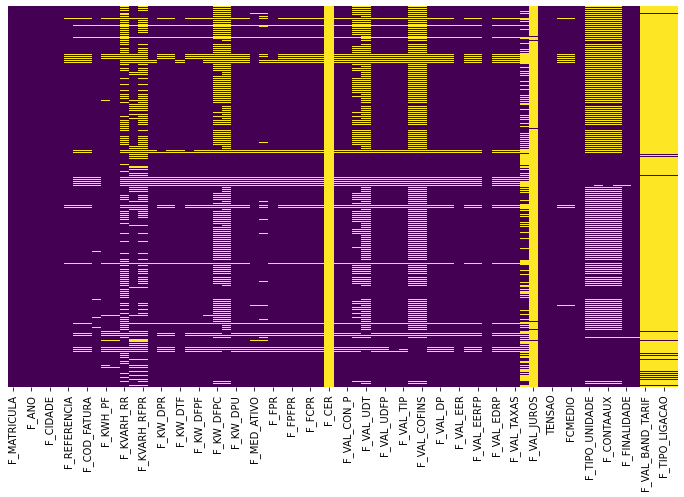

In [20]:
plt.figure(figsize=(12, 7))
sns.heatmap(df3.isnull(),yticklabels=False,cbar=False,cmap='viridis') #cbar false to binary situation

<AxesSubplot:>

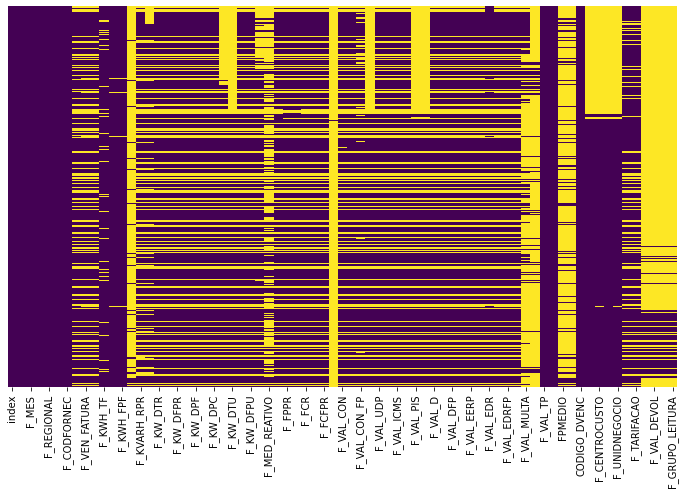

In [21]:
plt.figure(figsize=(12, 7))
sns.heatmap(df_analysis.isnull(),yticklabels=False,cbar=False,cmap='viridis') #cbar false to binary situation